# News Mood

### Analysis
-  The compound polarity scores of the media networks' last 100 tweets (500 tweets) were almost perfectly spread between positive, negative, and neutral scores. 
-  Judging by the negative events happening thoughout the world recently, it is no surprise that 4 of the 5 media networks had a negative polarity scored based on the average compound score for the 100 tweets analyzed. 
-  Not counting the tweets that had a neutral polarity score (0), the majority of the tweets analyzed for each media network either had a polarity score higher than 0.25 or lower than -0.25. Simply put, media networks' tweets, if not neutral, will either be highly positive or highly negative.


In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import tweepy
import time

from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from config import consumer_key, consumer_secret, access_token, access_token_secret

#Define SentimentIntensityAnalyzer function as variable for simplicity
analyzer = SentimentIntensityAnalyzer()

In [2]:
#Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser =tweepy.parsers.JSONParser())

In [3]:
#Create list of usernames for target news organizations
target_users = ["@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]

In [4]:
#Create an empty DataFrame for desired lists of values
news_info = {"Screen Name" : [],
             "Tweet": [],
             "Date": [],
             "Compound Score": [],
             "Positive Score": [],
             "Negative Score": [],
             "Neutral Score": [], 
             "Tweets Ago": []}

In [5]:
#Loop through each username in target_users
for username in target_users:
    
    #Keep track of tweet count
    tweet_count = 0
    
    #Loop through last 100 tweets 
    for x in range(5):
        #Pull tweets from username's timeline
        public_tweets = api.user_timeline(username, page=x)
        
        #Loop through tweets
        for tweet in public_tweets:
            #Track tweet count
            tweet_count += 1
            
            #Set variables
            text = tweet["text"]
            date = tweet["created_at"]
            account = tweet["user"]["screen_name"]
            polarity = analyzer.polarity_scores(text)
            
            #Add values to Dataframe
            news_info["Screen Name"].append(account)
            news_info["Tweet"].append(text)
            news_info["Date"].append(date)
            news_info["Compound Score"].append(polarity["compound"])
            news_info["Positive Score"].append(polarity["pos"])
            news_info["Negative Score"].append(polarity["neg"])
            news_info["Neutral Score"].append(polarity["neu"])
            news_info["Tweets Ago"].append(tweet_count)

In [6]:
#Create finalized DataFrame
final_news_info = pd.DataFrame(news_info, columns = ["Screen Name", "Tweet", "Date", "Compound Score",
                                   "Positive Score", "Negative Score", "Neutral Score",
                                   "Tweets Ago"])

#Display
final_news_info.head()

,Screen Name,Tweet,Date,Compound Score,Positive Score,Negative Score,Neutral Score,Tweets Ago
0,BBCWorld,Skripal poisoning: Russian diplomats leave Was...,Sun Apr 01 00:12:27 +0000 2018,-0.6124,0.000,0.500,0.500,1
1,BBCWorld,Syria war: 'Deal struck' to take critically in...,Sat Mar 31 23:59:35 +0000 2018,-0.8225,0.000,0.489,0.511,2
2,BBCWorld,Mali jihadist faces war crimes charges at Inte...,Sat Mar 31 22:32:48 +0000 2018,-0.8555,0.000,0.540,0.460,3
3,BBCWorld,In pictures: Christians celebrate Easter aroun...,Sat Mar 31 22:06:25 +0000 2018,0.5719,0.316,0.000,0.684,4
4,BBCWorld,French fairground ride hurls man to death http...,Sat Mar 31 21:15:33 +0000 2018,-0.5994,0.000,0.358,0.642,5


In [7]:
#Export DataFrame as CSV
final_news_info.to_csv("Output/Media_Tweets_Sentiment_Analysis.csv")

In [8]:
#Define a variable for each "Screen Name" in the DataFrame
BBC = final_news_info.loc[final_news_info["Screen Name"] == "BBCWorld"]
CBS = final_news_info.loc[final_news_info["Screen Name"] == "CBSNews"]
CNN = final_news_info.loc[final_news_info["Screen Name"] == "CNN"]
FOX = final_news_info.loc[final_news_info["Screen Name"] == "FoxNews"]
NYT = final_news_info.loc[final_news_info["Screen Name"] == "nytimes"]

### Sentiment Analysis of Media Tweets (scatterplot)

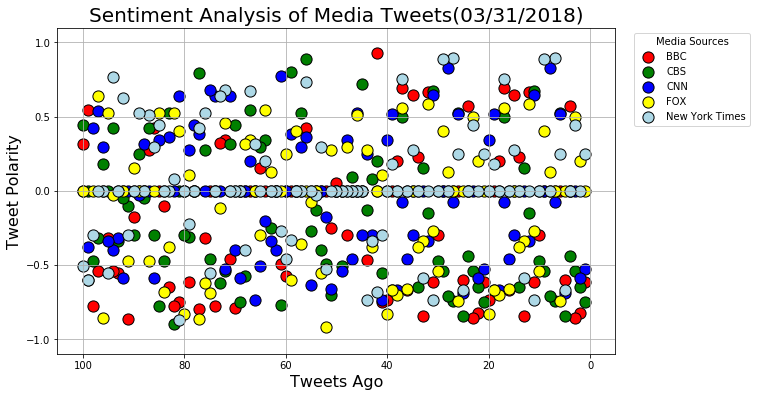

In [9]:
#Set size of scatter plots
plt.figure(figsize=(10,6))

#Create scatterplot for each "Screen Name" comparing "Tweets Ago" & "Compound Score"
plt.scatter(BBC["Tweets Ago"], BBC["Compound Score"], color= "red", edgecolor= "black", label= "BBC", s= 125)
plt.scatter(CBS["Tweets Ago"], CBS["Compound Score"], color= "green", edgecolor= "black", label= "CBS", s= 125)
plt.scatter(CNN["Tweets Ago"], CNN["Compound Score"], color= "blue", edgecolor= "black", label= "CNN", s= 125)
plt.scatter(FOX["Tweets Ago"], FOX["Compound Score"], color= "yellow", edgecolor= "black", label= "FOX", s= 125)
plt.scatter(NYT["Tweets Ago"], NYT["Compound Score"], color= "lightblue", edgecolor= "black", label= "New York Times", s= 125)

#Aesthetics
plt.title("Sentiment Analysis of Media Tweets" + "(" + time.strftime("%m/%d/%Y") + ")", fontsize=20)
plt.xlabel("Tweets Ago", fontsize=16)
plt.xlim(105, -5)
plt.ylabel("Tweet Polarity", fontsize=16)
plt.ylim(-1.1, 1.1)
plt.yticks(np.arange(-1.0, 1.1, 0.5))
plt.legend(bbox_to_anchor= (1.25, 1), title= "Media Sources", fontsize= "medium")

#Save plot as PNG image
plt.savefig("Images/Sentiment_Analysis_of_Media_Tweets.png", bbox_inches= "tight")

#Display Output
plt.grid()
plt.show()

### Sentiment Analysis of Media Tweets (bar plot)

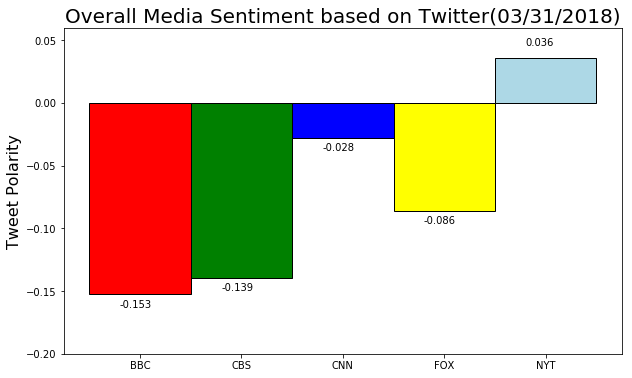

In [10]:
#Set size of bar plots
plt.figure(figsize=(10,6))

#Create bar plots for comparing the results of each Media Source's sentiment analysis
plt.bar(0, BBC["Compound Score"].mean(), color= "red", edgecolor= "black", width= 1)
plt.bar(1, CBS["Compound Score"].mean(), color= "green", edgecolor= "black", width= 1)
plt.bar(2, CNN["Compound Score"].mean(), color= "blue", edgecolor= "black", width= 1)
plt.bar(3, FOX["Compound Score"].mean(), color= "yellow", edgecolor= "black", width= 1)
plt.bar(4, NYT["Compound Score"].mean(), color= "lightblue", edgecolor= "black", width= 1)

#Aesthetics
plt.title("Overall Media Sentiment based on Twitter" + "(" + time.strftime("%m/%d/%Y") + ")", fontsize=20)

x_labels = ["BBC", "CBS", "CNN", "FOX", "NYT"]
x_location = [value for value in np.arange(5)]
plt.xticks(x_location, x_labels)

plt.ylabel("Tweet Polarity", fontsize=16)
plt.ylim(-.20, .06)
plt.yticks(np.arange(-0.20, 0.06, 0.05))

#Add value labels for each bar in plot  
for x,y in zip(np.arange(5), [BBC["Compound Score"].mean(), 
                              CBS["Compound Score"].mean(), 
                              CNN["Compound Score"].mean(), 
                              FOX["Compound Score"].mean(), 
                              NYT["Compound Score"].mean()]):
    if y > 0:
        plt.text(x-.2,y+.01,str(round(y,3)))
    else:
        plt.text(x-.2,y-.01,str(round(y,3)))

#Save plot as PNG image
plt.savefig("Images/Overall_Media_Sentiment.png")

#Display Output
#OPTIONAL based on visual preference --->  plt.grid()
plt.show()